In [1]:
import pandas as pd 
import numpy as np
import pickle
import os
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff


In [2]:
pd.options.display.max_rows = 100000
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
current_dir = os.getcwd()

# Specify the relative paths
DATA_PATH = os.path.join(current_dir, "data", "preprocessed_data.pkl")
ROLES_PATH = os.path.join(current_dir, "data", "roles_short_names.csv")
FIG_DIR = os.path.join(current_dir, "reports")

In [4]:
df = pd.read_pickle(DATA_PATH)
roles_names = pd.read_csv(ROLES_PATH, sep=';')

In [5]:
roles_names

,Original name,Short name
0,"Developer, back-end",Back-end dev
1,"Developer, full-stack",Full-stack dev
2,"Developer, front-end",Front-end dev
3,"Developer, desktop or enterprise applications",Desktop dev
4,"Developer, mobile",Mobile dev
5,DevOps specialist,DevOps
6,Database administrator,Database admin
7,Designer,Designer
8,System administrator,System admin
9,"Developer, embedded applications or devices",Embedded dev


In [6]:
ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

In [7]:
#takes a list of columns names to binarize, returns a set of binarazed dataframes for each column
def binarization(dataframe,columns_list):
    encoded_dataframes = {}
    for col in columns_list:
        binarizer = MultiLabelBinarizer()
        encoded_df = pd.DataFrame(binarizer.fit_transform(dataframe[col]),
                                columns=binarizer.classes_,
                                index=df[col].index)
        encoded_dataframes[col] = encoded_df
    return encoded_dataframes

In [8]:
col_list=ROLE_COLS + TECH_COLS  
encoded_dfs=binarization(df,col_list)

In [9]:
# concatenate encoded dfs into a single df
data = pd.concat(encoded_dfs, axis=1)
data.head(5)

DevType                           \
  Academic researcher Data or business analyst   
0                   0                        0   
1                   0                        0   
2                   0                        0   
3                   0                        0   
4                   0                        0   

                                                                        \
  Data scientist or machine learning specialist Database administrator   
0                                             0                      0   
1                                             0                      0   
2                                             0                      0   
3                                             0                      0   
4                                             0                      0   

                                                                        \
  Designer DevOps specialist Developer, QA or test Developer, back-end   
0        0                 0                     0                   0   
1        0                 0                     0                   0   
2        0                 0                     0                   0   
3        0                 0                     0                   0   
4        0                 0                     0                   0   

                                                 \
  Developer, desktop or enterprise applications   
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

                                                                    \
  Developer, embedded applications or devices Developer, front-end   
0                                           0                    0   
1                                           0                    0   
2                                           0                    0   
3                                           0                    1   
4                                           0                    0   

                                                                       \
  Developer, full-stack Developer, game or graphics Developer, mobile   
0                     0                           0                 1   
1                     0                           0                 0   
2                     0                           0                 0   
3                     0                           0                 0   
4                     1                           0                 0   

                                                                          \
  Educator Engineer, data Engineer, site reliability Engineering manager   
0        0              0                          0                   0   
1        0              0                          0                   0   
2        0              0                          0                   0   
3        0              0                          0                   0   
4        0              1                          0                   0   

                                                                           \
  Marketing or sales professional Other (please specify): Product manager   
0                               0                       0               0   
1                               0                       0               0   
2                               0                       0               0   
3                               0                       0               0   
4                               0                       1               0   

                                                                               \
  Scientist Senior Executive (C-Suite, VP, etc.) Student System administrator   
0         0                  

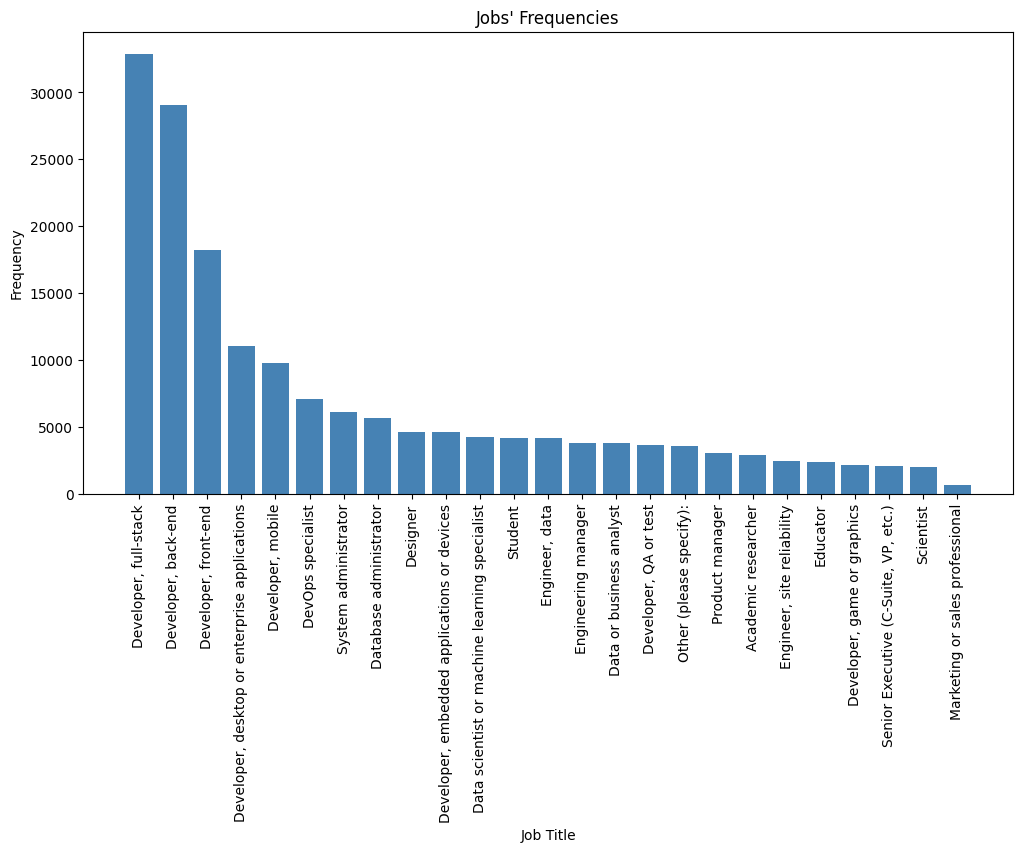

In [10]:
#jobs' frequencies
jobs_freq = data['DevType'].copy().sum().sort_values( ascending=False).reset_index()
job_titles = jobs_freq['index']
frequencies = jobs_freq[0]


plt.figure(figsize=(12, 6))
plt.bar(job_titles, frequencies, color='steelblue')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Jobs\' Frequencies')
plt.show()


In [16]:
# frequency of each technical skill/ used technology 
skills_freq = data.copy().drop('DevType', axis=1).sum().reset_index()
skills_freq.columns = ['group', 'skill', 'freq']
#skills_freq.sort_values('freq', ascending=False)

In [21]:
fig = px.treemap(skills_freq, 
                 path=['group', 'skill'], 
                 color_continuous_scale='deep',
                 values='freq',color='freq')

fig.update_layout(width=1200, height=600)
fig.show()

fig.write_html(os.path.join(FIG_DIR, 'treemap_skills_freq.html'))

#### Correlation between jobs and Skills

In [29]:
sorted_roles = data['DevType'].sum().sort_values().index.tolist()
sorted_skills = data.drop('DevType', axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [28]:
sorted_roles

['Marketing or sales professional',
 'Scientist',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, game or graphics',
 'Educator',
 'Engineer, site reliability',
 'Academic researcher',
 'Product manager',
 'Other (please specify):',
 'Developer, QA or test',
 'Data or business analyst',
 'Engineering manager',
 'Engineer, data',
 'Student',
 'Data scientist or machine learning specialist',
 'Developer, embedded applications or devices',
 'Designer',
 'Database administrator',
 'System administrator',
 'DevOps specialist',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, full-stack']